In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import os

In [98]:
# Define paths
dataset_path = "Dataset"
train_dir = os.path.join(dataset_path, "train")
test_dir = os.path.join(dataset_path, "test")                                                  # Importing confusion_matrix to plot the confusion matrix


In [99]:
# Data paths
train_dir = '/content/drive/MyDrive/Dataset/train'
test_dir = '/content/drive/MyDrive/Dataset/test'

In [100]:
# Data preprocessing
image_size = (128, 128)  # Resize images to 128x128
batch_size = 32


In [101]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [104]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [105]:
# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 32 images belonging to 2 classes.


In [106]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 32 images belonging to 2 classes.


In [108]:
# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

In [120]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.5),  # Dropout to reduce overfitting
    layers.Dense(1, activation='sigmoid')  # Binary classification
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [122]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [123]:
# Train the model
epochs = 10
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.4375 - loss: 3.2483 - val_accuracy: 0.5000 - val_loss: 2.9280
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.4375 - loss: 2.8959 - val_accuracy: 0.4688 - val_loss: 2.5767
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6562 - loss: 2.5200 - val_accuracy: 0.5000 - val_loss: 2.3049
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5312 - loss: 2.3032 - val_accuracy: 0.5000 - val_loss: 2.0331
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6250 - loss: 2.0074 - val_accuracy: 0.5000 - val_loss: 1.8743
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5938 - loss: 1.8472 - val_accuracy: 0.5000 - val_loss: 1.6343
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5312 - loss: 1.5908 - val_accuracy: 0.5000 - val_loss: 1.4640
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 1.4751 - val_accuracy: 0.5938 - val_loss: 1.3345
Epoch 9/10
1/1 ━

In [133]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=50,  # Allow more epochs
    validation_data=test_generator,
    callbacks=[early_stopping]  # Early stopping
)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5000 - loss: 1.1493 - val_accuracy: 0.5625 - val_loss: 1.0701
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5625 - loss: 1.0772 - val_accuracy: 0.5625 - val_loss: 1.0139
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4375 - loss: 1.0299 - val_accuracy: 0.5625 - val_loss: 0.9700
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5312 - loss: 0.9777 - val_accuracy: 0.5000 - val_loss: 0.9355
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4688 - loss: 0.9429 - val_accuracy: 0.5000 - val_loss: 0.9103
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.9192 - val_accuracy: 0.5000 - val_loss: 0.8917
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5625 - loss: 0.8835 - val_accuracy: 0.5000 - val_loss: 0.8777
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5312 - loss: 0.8756 - val_accuracy: 0.5000 - val_loss: 0.8652
Epoch 9/50
1/1 ━

In [134]:
# Save the model
model.save("smile_sad_classifier.h5")


In [135]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 985ms/step - accuracy: 0.8750 - loss: 0.4427
Test Accuracy: 87.50%


In [136]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image(img_path):  # Pass the image path as a parameter
    img = image.load_img(img_path, target_size=image_size)  # Load the image
    img_array = image.img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)  # Get the prediction
    return "Smile" if prediction[0][0] > 0.5 else "Sad"  # Interpret the result





In [140]:
def predict_image(img_path):
    img = image.load_img(img_path, target_size=image_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    print(f"Prediction Confidence: {prediction[0][0]:.4f}")
    return "Smile" if prediction[0][0] > 0.5 else "Sad"


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


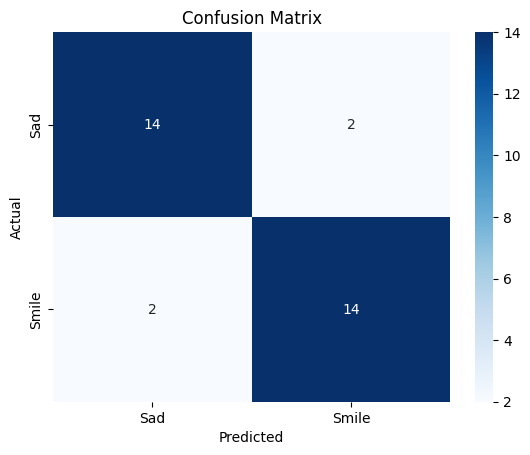

In [146]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(test_generator)
y_pred_classes = (y_pred > 0.5).astype(int)

cm = confusion_matrix(test_generator.classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Sad', 'Smile'], yticklabels=['Sad', 'Smile'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [151]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the pretrained layers

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


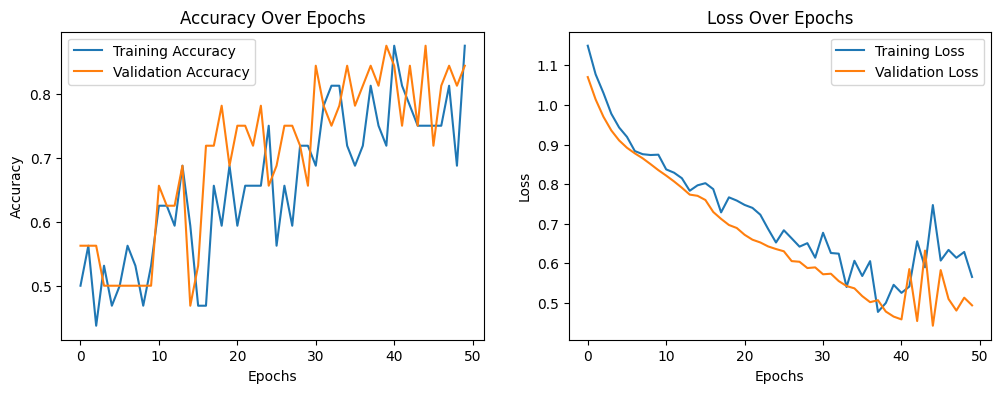

In [156]:
import matplotlib.pyplot as plt

def plot_training(history):
    plt.figure(figsize=(12, 4))
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy Over Epochs')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Over Epochs')

    plt.show()

plot_training(history)


In [155]:
# Example usage
img_path = '/content/drive/MyDrive/Example/HaythemProject.jpeg'  # Path to your image
result = predict_image(img_path)
print(f"Prediction: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Prediction Confidence: 0.1237
Prediction: Sad


In [154]:
# Example usage
img_path = '/content/drive/MyDrive/Example/Messi.webp'  # Path to your image
result = predict_image(img_path)
print(f"Prediction: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Prediction Confidence: 0.1161
Prediction: Sad


In [153]:
# Example usage
img_path = '/content/drive/MyDrive/Example/Ronaldo.jpg'  # Path to your image
result = predict_image(img_path)
print(f"Prediction: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Prediction Confidence: 0.3516
Prediction: Sad


In [152]:
# Example usage
img_path = '/content/drive/MyDrive/Example/EMOJI.jpg'  # Path to your image
result = predict_image(img_path)
print(f"Prediction: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction Confidence: 0.5601
Prediction: Smile
